### dataset: https://huggingface.co/datasets/valhalla/emoji-dataset


https://www.kaggle.com/datasets/subinium/emojiimage-dataset/data

In [ ]:
# %pip install hf_xet

# %pip install kagglehub[pandas-datasets]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from datasets import load_dataset

ds = load_dataset("valhalla/emoji-dataset")

c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\angel\.cache\huggingface\hub\datasets--valhalla--emoji-dataset. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an

In [8]:
from datasets import load_dataset
import matplotlib.pyplot as plt

# de nuevo cargarlos xd
ds = load_dataset("valhalla/emoji-dataset")

# Seleccionar train
data = ds["train"]



In [10]:
print(data)
print(f"Número total de imágenes: {len(data)}")
print("Ejemplo de entrada:", data[0])

Dataset({
    features: ['image', 'text'],
    num_rows: 2749
})
Número total de imágenes: 2749
Ejemplo de entrada: {'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x18AC62ACEC0>, 'text': 'grinning face'}


                      emoji  count
5          mother christmas      6
2228             baby angel      6
7                 superhero      6
2218    man with gua pi mao      6
2220  person with headscarf      6
2221          man in tuxedo      6
2223        bride with veil      6
2225         pregnant woman      6
2226         breast feeding      6
4          father christmas      6


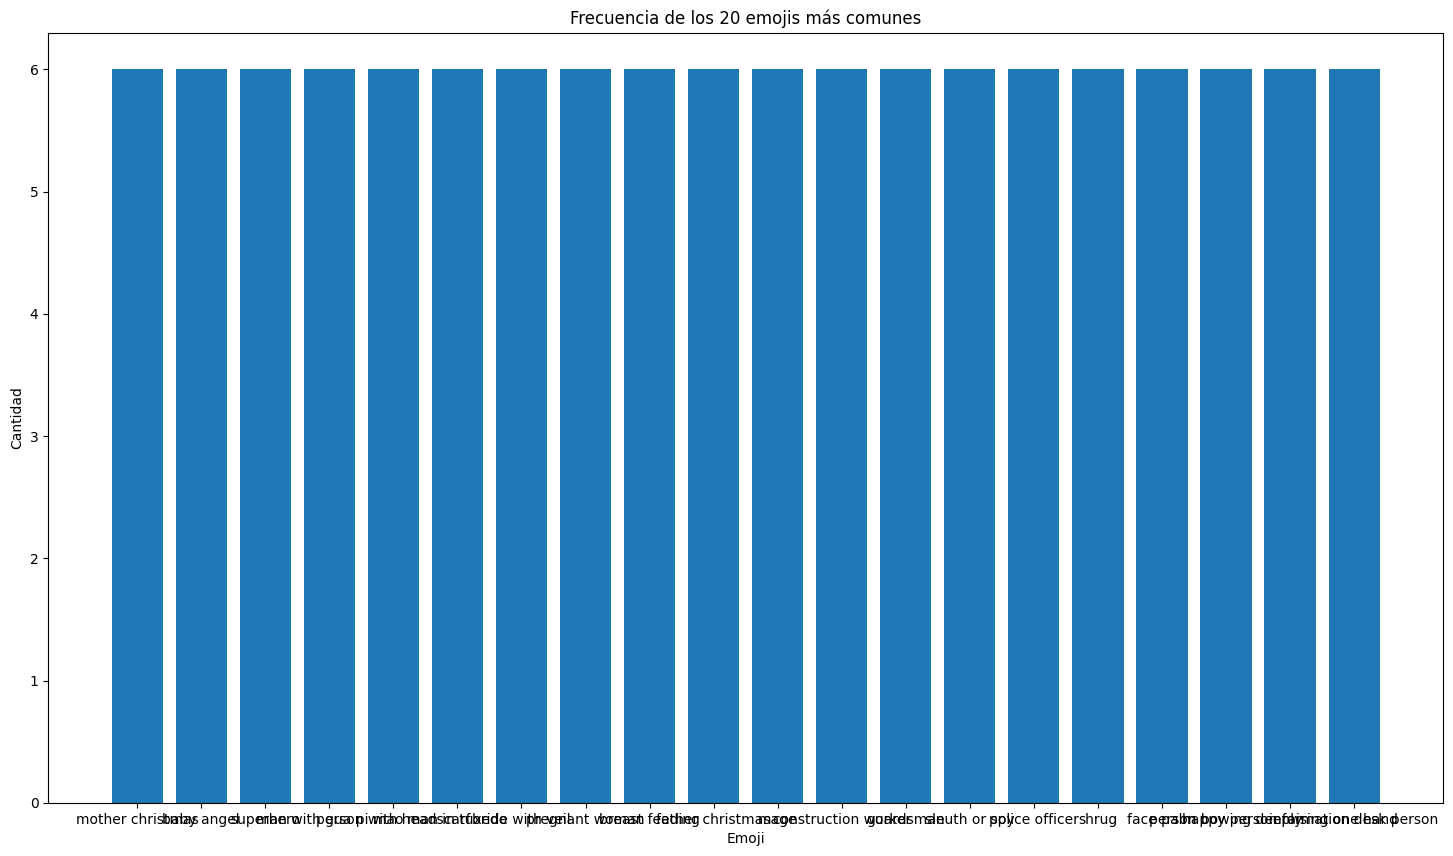

In [17]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Contar ocurrencias de cada emoji
counter = Counter([ex["text"] for ex in data])

# Crear DataFrame ordenado
df = pd.DataFrame(counter.items(), columns=["emoji", "count"]).sort_values("count", ascending=False)

# top 10 emojis más frecuentes
print(df.head(10))  

# Graficar distribución
plt.figure(figsize=(18,10))
plt.bar(df["emoji"][:20], df["count"][:20])
plt.title("Frecuencia de los 20 emojis más comunes")
plt.xlabel("Emoji")
plt.ylabel("Cantidad")
plt.show()


In [20]:
# imprimir todas las categorias
# df["emoji"].unique()

df["emoji"].value_counts()


emoji
mother christmas                         1
baby angel                               1
superhero                                1
man with gua pi mao                      1
person with headscarf                    1
                                        ..
woman superhero medium skin tone         1
woman superhero dark skin tone           1
woman superhero medium dark skin tone    1
woman wearing turban type 1 2            1
woman wearing turban type 3              1
Name: count, Length: 2229, dtype: int64

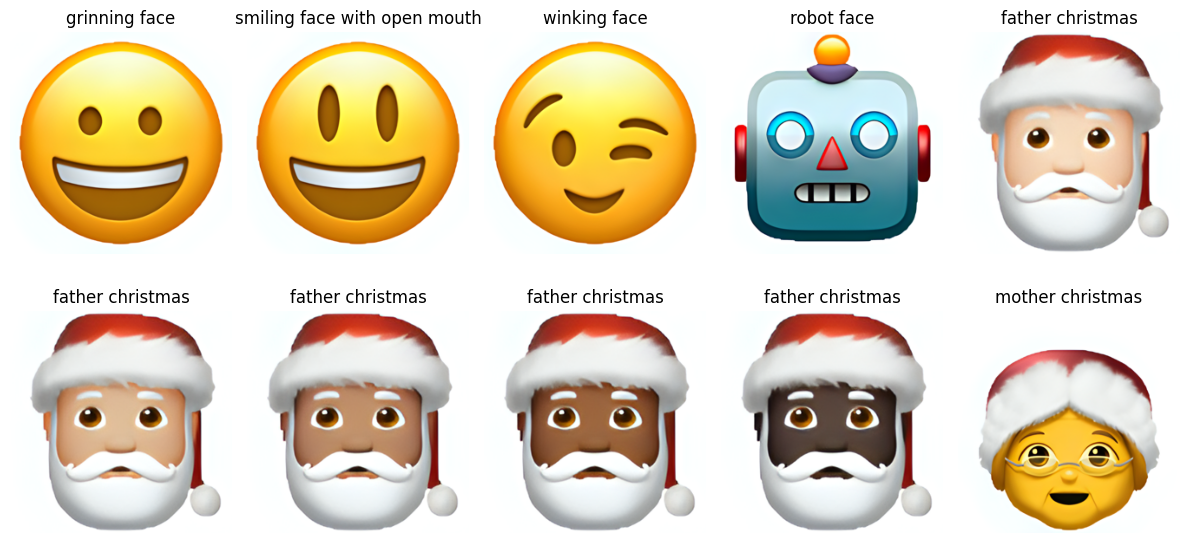

In [ ]:

plt.figure(figsize=(12, 6))
for i in range(10):
    img = data[i]["image"]
    text = data[i]["text"]
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(text, fontsize=12)
    plt.axis("off")

plt.tight_layout()
plt.show()
